# Check the Tensorflow version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# Import required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

# CIFAR-10 Dataset

![](https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/datasets/cifar10.png)

**The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.**

# Load the CIFAR-10 Dataset from keras

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Split them into train & test
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

170508288/170498071 [==============================] - 13s 0us/step


# Check the shape

In [ ]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


# Check the number of classes in dataset

In [ ]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


# Build the Model

In [ ]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# We did Batch Normalization, See this to understand easily👇

![](https://i1.wp.com/csmoon-ml.com/wp-content/uploads/2019/04/1WRio7MD4JDeLww-CyrxEbg.png?fit=709%2C412)

![](https://pbs.twimg.com/media/DpN0VplXcAAoBjy.jpg)

In [ ]:
# Note: make sure you are using the GPU for this.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# It's time to Training

In [ ]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 25s 7ms/step - loss: 1.2843 - accuracy: 0.5588 - val_loss: 0.9845 - val_accuracy: 0.6598
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8482 - accuracy: 0.7079 - val_loss: 0.8773 - val_accuracy: 0.7031
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6929 - accuracy: 0.7613 - val_loss: 0.7574 - val_accuracy: 0.7411
Epoch 4/50
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5837 - accuracy: 0.7989 - val_loss: 0.6592 - val_accuracy: 0.7797
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4973 - accuracy: 0.8298 - val_loss: 0.7337 - val_accuracy: 0.7599
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4186 - accuracy: 0.8569 - val_loss: 0.6728 - val_accuracy: 0.7785
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3514 - accuracy: 0.8766 - val_loss: 0.6748 - val_ac

# Retrain data with augmentation

## Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off.


In [ ]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


1562/1562 [==============================] - 35s 22ms/step - loss: 0.5451 - accuracy: 0.8287 - val_loss: 0.5392 - val_accuracy: 0.8334
Epoch 2/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.4342 - accuracy: 0.8557 - val_loss: 0.4855 - val_accuracy: 0.8425
Epoch 3/50
1562/1562 [==============================] - 33s 21ms/step - loss: 0.4041 - accuracy: 0.8659 - val_loss: 0.4445 - val_accuracy: 0.8561
Epoch 4/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3849 - accuracy: 0.8728 - val_loss: 0.4821 - val_accuracy: 0.8457
Epoch 5/50
1562/1562 [==============================] - 35s 22ms/step - loss: 0.3653 - accuracy: 0.8783 - val_loss: 0.4918 - val_accuracy: 0.8519
Epoch 6/50
1562/1562 [==============================] - 34s 21ms/step - loss: 0.3518 - accuracy: 0.8812 - val_loss: 0.4126 - val_accuracy: 0.8680
Epoch 7/50
1562/1562 [==============================] - 34s 22ms/step - loss: 0.3352 - accuracy: 0.8869 - val_loss: 0.4273 - val_accura

# Let's plot Loss

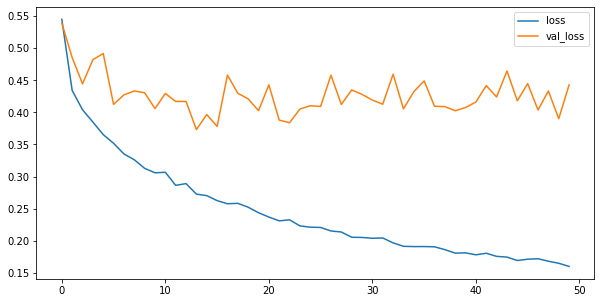

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,5]
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Let's plot Accuracy

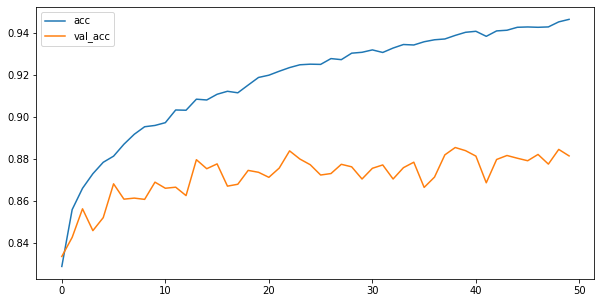

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Now plot the confusion matrix

Confusion matrix, without normalization
[[930   9  12   7   2   3   3   3  11  20]
 [  3 970   1   2   1   0   0   0   3  20]
 [ 27   1 853  33  18  19  32  11   3   3]
 [ 12   5  42 829  14  53  24  10   5   6]
 [ 14   1  48  55 806  18  37  16   2   3]
 [  9   4  24 128  20 777  21  14   0   3]
 [  6   0  34  38   5   3 910   1   2   1]
 [  7   0  14  37  14  14   3 905   1   5]
 [ 35  16   3   3   2   3   1   1 919  17]
 [ 16  55   1   4   0   1   1   2   6 914]]


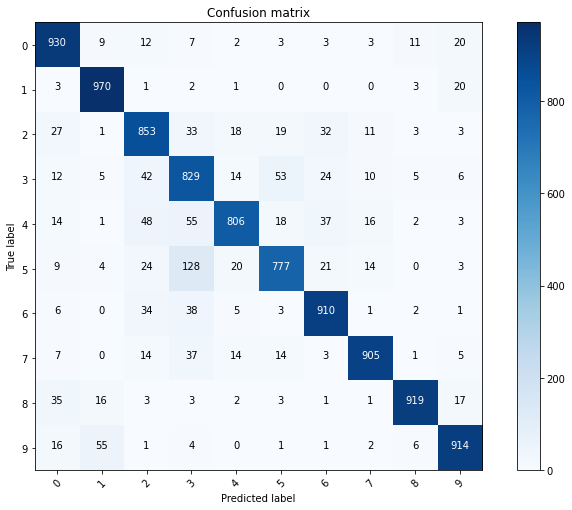

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
plt.rcParams['figure.figsize'] = [10,7]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Define the Labels

In [ ]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# Check the Right predictions

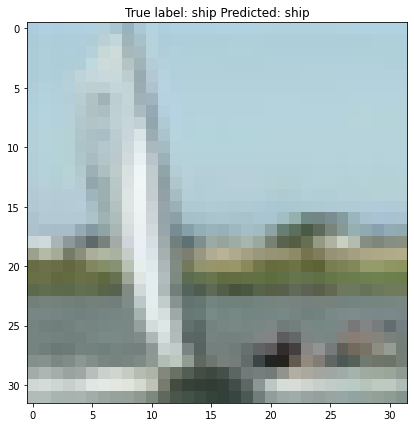

In [ ]:
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Check the wrong predictions

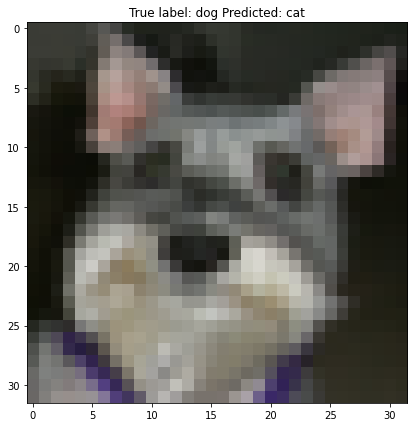

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Check the model summary

In [ ]:
# Now that the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0     

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def predict_image(img):
  img_4d=img.reshape(-1,32,32,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(10)}

In [ ]:
image = gr.inputs.Image(shape=(32,32))
label = gr.outputs.Label(num_top_classes=10)

gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://43938.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f849f97d610>,
 'http://127.0.0.1:7861/',
 'https://43938.gradio.app')